In [36]:
# load packages
import pandas as pd # data manipulation
import matplotlib.pyplot as plt # visualisation
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline

## 1 Load Data

In [2]:
# read csv file
train = pd.read_csv('train.csv')

In [3]:
# inspect data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",male,NaN,NaN,NaN,1601,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


## 2 Clean Data

In [6]:
# drop columns with >40% null values

null_col = list(train.columns[train.isnull().sum() > len(train)*0.4])
train.drop(null_col, axis=1, inplace=True)

In [7]:
# drop passengerid, name and ticket column
train.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

In [8]:
# fill null values in age with mean
train['Age'].fillna(train['Age'].mean(), inplace=True)

# fill null values in embarked with mode
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)

In [9]:
# create a copy
train_clean = train.copy()

In [10]:
# check train
train.describe(include='all')

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891,891.000000,891.000000,891.000000,891.000000,891
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,646
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN
std,0.486592,0.836071,NaN,13.002015,1.102743,0.806057,49.693429,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN
25%,0.000000,2.000000,NaN,22.000000,0.000000,0.000000,7.910400,NaN
50%,0.000000,3.000000,NaN,29.699118,0.000000,0.000000,14.454200,NaN
75%,1.000000,3.000000,NaN,35.000000,1.000000,0.000000,31.000000,NaN


In [11]:
# get dummies for sex
train['Male'] = pd.get_dummies(train['Sex'], drop_first=True)

# get dummies for embarked
embarked_dummies = pd.get_dummies(train['Embarked'], drop_first=True)
train = pd.concat([train, embarked_dummies], axis=1)

# drop original columns
train.drop(['Sex', 'Embarked'], axis=1, inplace=True)

In [12]:
# check train
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


## 3 Data Visualisation

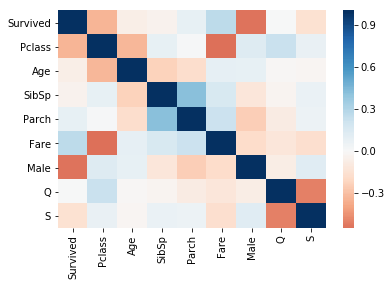

In [13]:
# plot heatmap
sns.heatmap(train.corr(), center=0, cmap='RdBu')

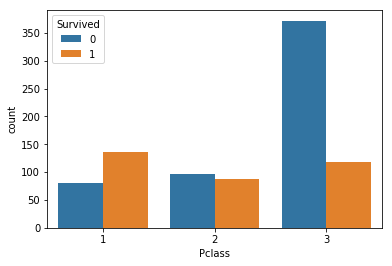

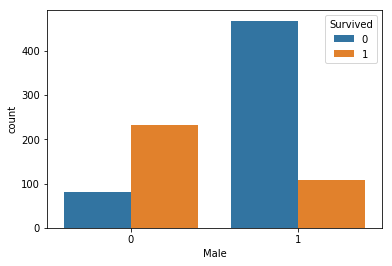

In [14]:
# plot countplots
for i, col in enumerate(['Pclass', 'Male']):
    plt.figure(i)
    sns.countplot(train[col], hue=train['Survived'])

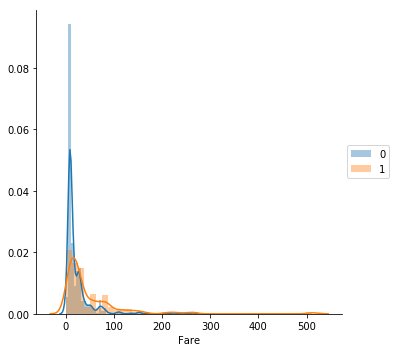

In [15]:
# plot distplot
g = sns.FacetGrid(train, hue="Survived", size=5, legend_out=True)
g = g.map(sns.distplot, "Fare")
plt.legend(loc='center left',bbox_to_anchor=(1,0.5))

### 4 Modelling

In [16]:
# create X and y
X = train.drop('Survived', axis=1)
y = train['Survived']

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [17]:
# scale
ss = StandardScaler()
Xs_train = ss.fit_transform(X_train)
Xs_test = ss.transform(X_test)

In [19]:
# logistic regression

lrcv = LogisticRegressionCV()
lrcv.fit(X_train, y_train)
lrcv_score = lrcv.score(X_train, y_train)
print(lrcv_score)

lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_score = lr.score(X_train, y_train)
print(lr_score)

0.7986577181208053
0.8036912751677853


In [20]:
# KNN

score = []
for k in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    knn_score = knn.score(X_train, y_train)
    score.append((knn_score, k))

best_k = score[0][1]
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
knn_score = knn.score(X_train, y_train)
print(knn_score)

0.9798657718120806


### 5 Prediction

In [21]:
# read csv file
test = pd.read_csv('test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [22]:
pass_ids = test['PassengerId']

In [23]:
# drop passengerid, name and ticket column
test.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [24]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [25]:
# fill null values in age with mean
test['Age'].fillna(train_clean['Age'].mean(), inplace=True)

# fill null values in embarked with mode
test['Embarked'].fillna(train_clean['Embarked'].mode()[0], inplace=True)

# fill null values in fare with median
test['Fare'].fillna(train_clean['Fare'].median(), inplace=True)

In [26]:
# get dummies for sex
test['Male'] = pd.get_dummies(test['Sex'], drop_first=True)

# get dummies for embarked
embarked_dummies = pd.get_dummies(test['Embarked'], drop_first=True)
test = pd.concat([test, embarked_dummies], axis=1)

# drop original columns
test.drop(['Sex', 'Embarked'], axis=1, inplace=True)

In [27]:
test.describe(include='all')

,Pclass,Age,SibSp,Parch,Fare,Male,Q,S
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,2.265550,30.154603,0.447368,0.392344,35.576535,0.636364,0.110048,0.645933
std,0.841838,12.636666,0.896760,0.981429,55.850103,0.481622,0.313324,0.478803
min,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,23.000000,0.000000,0.000000,7.895800,0.000000,0.000000,0.000000
50%,3.000000,29.699118,0.000000,0.000000,14.454200,1.000000,0.000000,1.000000
75%,3.000000,35.750000,1.000000,0.000000,31.471875,1.000000,0.000000,1.000000
max,3.000000,76.000000,8.000000,9.000000,512.329200,1.000000,1.000000,1.000000


In [28]:
test.head()

,Pclass,Age,SibSp,Parch,Fare,Male,Q,S
0,3,34.5,0,0,7.8292,1,1,0
1,3,47.0,1,0,7.0000,0,0,1
2,2,62.0,0,0,9.6875,1,1,0
3,3,27.0,0,0,8.6625,1,0,1
4,3,22.0,1,1,12.2875,0,0,1


In [29]:
test_s = ss.transform(test)

In [43]:
# create dataframe of predictions and save to csv
prediction_knn = pd.DataFrame({'Survived':knn.predict(test_s)}, index=pass_ids)
prediction_knn.to_csv('prediction_knn.csv')

In [44]:
prediction_lr = pd.DataFrame({'Survived':lr.predict(test_s)}, index=pass_ids)
prediction_lr.to_csv('prediction_lr.csv')